In [2]:
#MLP w/ one input ,one hidden and one output layer on non linear data
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons

In [3]:
# Sigmoid for a numpy vector
def sigmoid(X):
    res = 1.0/(1+np.exp(-X))
    return res

(1000, 2)
[[ 2.04271531  1.72033708 -0.26386729 ...  0.33823662  0.1269428
   0.54241537]
 [ 0.51812416 -0.13233804  0.76382643 ... -0.43099924  0.09966251
  -0.47450809]]


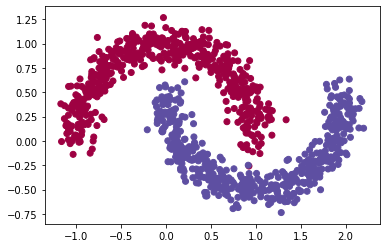

(2, 1000) (1, 1000)


In [8]:
# no. of taining examples
m = 1000

# Generate non linear dataset
X, Y = make_moons(n_samples=m, noise=0.1, random_state=0)
print(X.shape)

X = X.T

# visualizing data 
plt.scatter(X[0,:], X[1,:], c = Y, cmap = plt.cm.Spectral) 
plt.show()

#reshape Y
Y = Y.reshape((m,1))
Y=Y.T
print(X.shape,Y.shape)

In [244]:
#forward propagation takes input matrix and parameters as arguments 
def forward_prop(X):
    
    global parameters
    global m
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # MLP EQUATIONS
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2) # here A2 denotes Yhat or the predicted output
    
    #Intermediate values
    temp = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, temp

In [245]:
# A2 denotes the second activation of shape (1,m)
def loss(A2, Y):
    
    # Binary Cross Entropy
    #logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    #cost = -np.sum(logprobs) / m
    
    #MSE
    cost = np.sum(np.multiply((A2-Y)*(A2-Y)) )/m
    cost = np.squeeze(cost)    
    return cost

In [235]:
#backward propagation
def back_prop(temp, X, Y):
    
    global parameters
    global m
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    #Activation values
    A1 = temp["A1"]
    A2 = temp["A2"]
    
    dZ2 = A2-Y
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))                            
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))         
    dW1 = 1/m*(np.dot(dZ1,X.T))
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    
    grad = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grad

In [246]:
n_x = X.shape[0] # size of input layer
n_h = 5 # size of hidden layer
n_y = Y.shape[0] # size of output layer

W1 = np.random.randn(n_h,n_x)*0.01 # Weight matrix (n_h,n_x) 
b1 = np.zeros((n_h,1)) # bias vector
W2 = np.random.randn(n_y,n_h)*0.01 #Weight matrix (n_y, n_h)
b2 = np.zeros((n_y,1))# bias vector

#parameters dictionary
parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}


for i in range(0, 10001):
    A2, temp = forward_prop(X)
    cost = loss(A2,Y)
    grad = back_prop(temp,X,Y)
    
    #update weights and biases
    parameters["W1"]-= 0.5 * grad["dW1"]
    parameters["W2"]-= 0.5 * grad["dW2"]
    parameters["b1"]-= 0.5 * grad["db1"]
    parameters["b2"]-= 0.5 * grad["db2"]
    
    if (i % 1000 == 0):
        print ("Loss after iteration %i: %f" %(i, cost))

Loss after iteration 0: 0.693113
Loss after iteration 1000: 0.253483
Loss after iteration 2000: 0.104471
Loss after iteration 3000: 0.012277
Loss after iteration 4000: 0.007414
Loss after iteration 5000: 0.005633
Loss after iteration 6000: 0.004694
Loss after iteration 7000: 0.004111
Loss after iteration 8000: 0.003712
Loss after iteration 9000: 0.003421
Loss after iteration 10000: 0.003200


In [250]:
A2, temp = forward_prop(X)
predict = 1*(A2>0.5)

In [252]:
print ('Accuracy: %d' % float((np.dot(Y,predict.T) + np.dot(1-Y,1-predict.T))/float(Y.size)*100) + '%')

Accuracy: 99%
